In [1]:
import numpy as np
from collections import Counter 
import matplotlib.pyplot as plt
import codecs
import chardet
from wordcloud import WordCloud
import jieba
from scipy.misc import imread
import os
from os import path
from PIL import Image,ImageDraw,ImageFont
import jieba.analyse
import pandas as pd
import re
import seaborn as sns

In [2]:
#读取数据
df = pd.read_csv('./Market_Basket_Optimisation.csv', sep='\t', header=None, names=['shopping_basket'])
df.head(10)

,shopping_basket
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."
5,low fat yogurt
6,"whole wheat pasta,french fries"
7,"soup,light cream,shallot"
8,"frozen vegetables,spaghetti,green tea"
9,french fries


In [3]:
# 数据清洗
df['shopping_basket'] = df['shopping_basket'].str.replace(', ', ',')
df['shopping_basket'] = df['shopping_basket'].str.replace(' ', '_')
df.head(5)

,shopping_basket
0,"shrimp,almonds,avocado,vegetables_mix,green_gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral_water,milk,energy_bar,whole_wheat_rice..."


In [4]:
#查看空格数
df['shopping_basket'].str.contains(pat=' ').sum()

0

In [5]:
# 将逗号分隔符替换为空格分隔符
df['shopping_basket'] = df['shopping_basket'].str.replace(',', ' ')
df.head(5)

,shopping_basket
0,shrimp almonds avocado vegetables_mix green_gr...
1,burgers meatballs eggs
2,chutney
3,turkey avocado
4,mineral_water milk energy_bar whole_wheat_rice...


In [6]:
# 将每一行的字符串拼接成一个大字符串
comment_text = df['shopping_basket'].str.cat(sep=' ')
comment_text

'shrimp almonds avocado vegetables_mix green_grapes whole_weat_flour yams cottage_cheese energy_drink tomato_juice low_fat_yogurt green_tea honey salad mineral_water salmon antioxydant_juice frozen_smoothie spinach olive_oil burgers meatballs eggs chutney turkey avocado mineral_water milk energy_bar whole_wheat_rice green_tea low_fat_yogurt whole_wheat_pasta french_fries soup light_cream shallot frozen_vegetables spaghetti green_tea french_fries eggs pet_food cookies turkey burgers mineral_water eggs cooking_oil spaghetti champagne cookies mineral_water salmon mineral_water shrimp chocolate chicken honey oil cooking_oil low_fat_yogurt turkey eggs turkey fresh_tuna tomatoes spaghetti mineral_water black_tea salmon eggs chicken extra_dark_chocolate meatballs milk honey french_fries protein_bar red_wine shrimp pasta pepper eggs chocolate shampoo rice sparkling_water spaghetti mineral_water ham body_spray pancakes green_tea burgers grated_cheese shrimp pasta avocado honey white_wine toothp

In [7]:
#定义词云图函数
def draw_wordcloud(comment_text):

    #导入图片
    image1 = Image.open(r'./购物篮.jpg')
    MASK = np.array(image1)
    WC = WordCloud(max_words=100,mask = MASK,max_font_size=150,background_color='white',collocations=False,mode='RGB') #设置词云图对象属性
    con = WC.generate(comment_text)
    plt.figure(num='fig1', figsize=(20, 10), dpi=100, facecolor='#FFFFFF', edgecolor='#0000FF')
    plt.imshow(con)
    plt.axis("off")
    plt.show()
    WC.to_file('./shopping_basket.png')
    return WC.words_ 

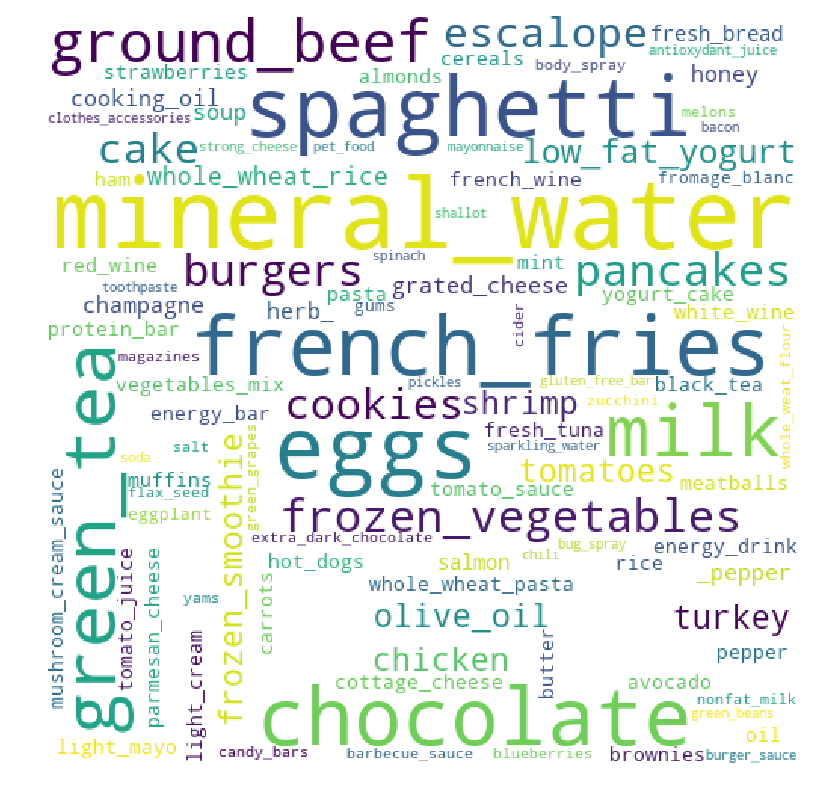

In [8]:
#绘制词云图
words = draw_wordcloud(comment_text)

In [9]:
words

{'mineral_water': 1.0,
 'eggs': 0.7539149888143176,
 'spaghetti': 0.7304250559284117,
 'french_fries': 0.7170022371364653,
 'chocolate': 0.6879194630872483,
 'green_tea': 0.5542505592841164,
 'milk': 0.5436241610738255,
 'ground_beef': 0.4121923937360179,
 'frozen_vegetables': 0.39988814317673377,
 'pancakes': 0.3987695749440716,
 'burgers': 0.36577181208053694,
 'cake': 0.3400447427293065,
 'cookies': 0.337248322147651,
 'escalope': 0.3327740492170022,
 'low_fat_yogurt': 0.32102908277404923,
 'shrimp': 0.29977628635346754,
 'tomatoes': 0.28691275167785235,
 'olive_oil': 0.27628635346756153,
 'frozen_smoothie': 0.2656599552572707,
 'turkey': 0.26230425055928414,
 'chicken': 0.2516778523489933,
 'whole_wheat_rice': 0.24552572706935122,
 'grated_cheese': 0.2197986577181208,
 'cooking_oil': 0.21420581655480983,
 'soup': 0.21196868008948547,
 'herb_': 0.20749440715883669,
 '_pepper': 0.20749440715883669,
 'honey': 0.19910514541387025,
 'champagne': 0.19630872483221476,
 'fresh_bread': 0.18

In [10]:
#数据转换
dfs = df['shopping_basket'].str.get_dummies(sep=' ')
dfs.head(10)

,almonds,antioxydant_juice,asparagus,avocado,babies_food,bacon,barbecue_sauce,black_tea,blueberries,body_spray,...,turkey,vegetables_mix,water_spray,white_wine,whole_weat_flour,whole_wheat_pasta,whole_wheat_rice,yams,yogurt_cake,zucchini
0,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#计数
fr = dfs.sum(axis=0)

In [12]:
#打印前20行
fr[:20]

almonds              153
antioxydant_juice     67
asparagus             36
avocado              250
babies_food           34
bacon                 65
barbecue_sauce        81
black_tea            107
blueberries           69
body_spray            86
bramble               14
brownies             253
bug_spray             65
burger_sauce          44
burgers              654
butter               226
cake                 608
candy_bars            73
carrots              115
cauliflower           36
dtype: int64

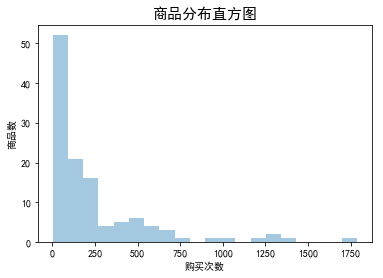

In [13]:
#查看整体分布
import warnings
warnings.simplefilter("ignore")
sns.distplot(fr, kde=False)
plt.title("商品分布直方图", fontsize=15)
plt.xlabel("购买次数", fontsize=10)
plt.ylabel("商品数", fontsize=10)
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.show()

In [14]:
#转换数据格式
bm = pd.DataFrame(fr).reset_index(drop = False)
bm.columns = ['单词','出现次数']
bm

,单词,出现次数
0,almonds,153
1,antioxydant_juice,67
2,asparagus,36
3,avocado,250
4,babies_food,34
5,bacon,65
6,barbecue_sauce,81
7,black_tea,107
8,blueberries,69
9,body_spray,86


In [15]:
#排序
res = bm.sort_values(by='出现次数', axis=0, ascending=False).reset_index(drop = True)

In [16]:
#提取TOP10商品
ress = res.head(10)
ress

,单词,出现次数
0,mineral_water,1788
1,eggs,1348
2,spaghetti,1306
3,french_fries,1282
4,chocolate,1229
5,green_tea,991
6,milk,972
7,ground_beef,737
8,frozen_vegetables,715
9,pancakes,713


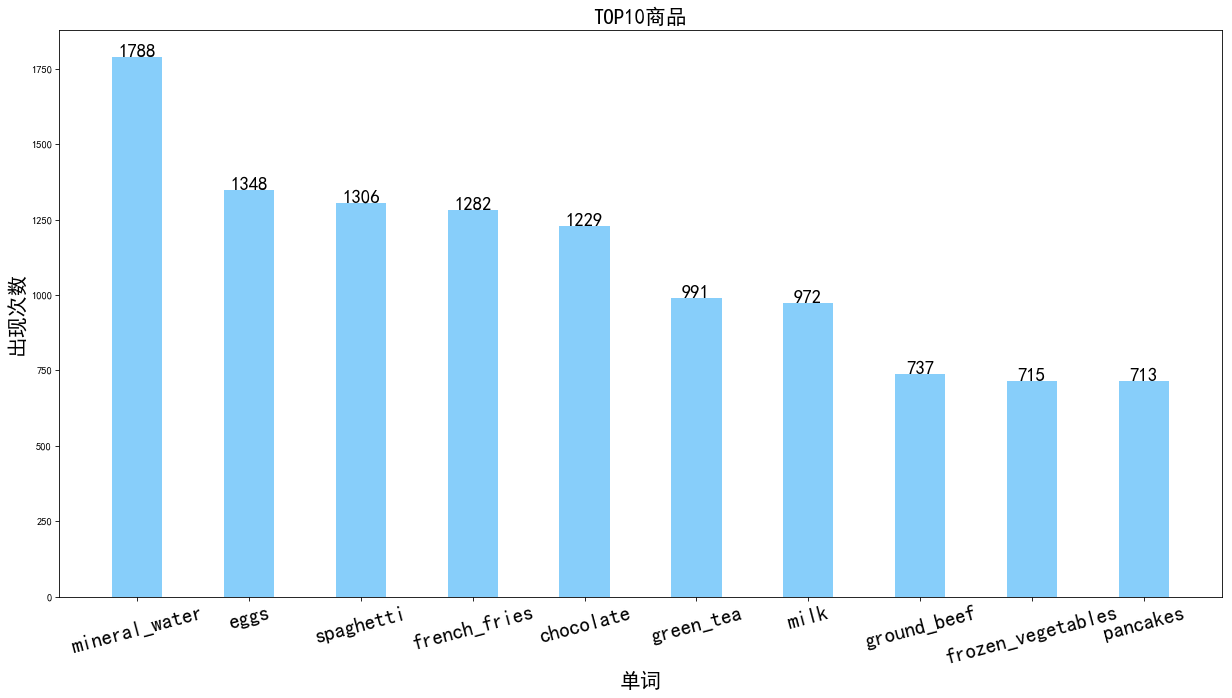

In [18]:
#TOP10商品可视化
plt.figure(num='fig1', figsize=(20, 10), dpi=75, facecolor='#FFFFFF', edgecolor='#0000FF')
plt.bar(ress["单词"], ress["出现次数"], 0.45, label="num", color="#87CEFA")
# 设置横轴标签
plt.xlabel('单词', fontsize=20)
# 设置纵轴标签
plt.ylabel('出现次数', fontsize=20)
# 添加标题
plt.title('TOP10商品', fontsize=20)
plt.xticks(fontsize=20)
plt.xticks(rotation=15)
for a,b in zip(ress["单词"],ress["出现次数"]):
        plt.text(a,b,int(b),ha='center',  weight="bold", color='black', fontsize=18)
plt.show()